In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df=pd.read_csv('donnée_malades_cardiaques.csv',index_col=0)

In [63]:
df

,Âge,Sexe,Tension_aurepos,Cholestérol,Glycémieà_jeun,Fréquence_cardiaque_max,Angine_d_effort,Dépression_ST,Maladie_cardiaque,Type_de_douleur_thoracique_ASY,Type_de_douleur_thoracique_ATA,Type_de_douleur_thoracique_NAP,Type_de_douleur_thoracique_TA,ECG_au_repos_LVH,ECG_au_repos_ST,Pente_ST_Flat,Pente_ST_Up
0,40,1,140,289,0,172,0,0,0,0,1,0,0,0,0,0,1
1,49,0,160,180,0,156,0,1,1,0,0,1,0,0,0,1,0
2,37,1,130,283,0,98,0,0,0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1,1,1,0,0,0,0,0,1,0
4,54,1,150,195,0,122,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1,1,0,0,0,1,0,0,1,0
914,68,1,144,193,1,141,0,3,1,1,0,0,0,0,0,1,0
915,57,1,130,131,0,115,1,1,1,1,0,0,0,0,0,1,0
916,57,0,130,236,0,174,0,0,1,0,1,0,0,1,0,1,0


## Analyse exploratoire des données (EDA)

Nous allons utiliser la bibliothèque ***Seaborn*** pour explorer visuellement les données et identifier les relations entre les variables

In [64]:
value_counts = df['Maladie_cardiaque'].value_counts()
print(value_counts)

Maladie_cardiaque
1    507
0    410
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_23276\146761879.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Maladie_cardiaque', palette='viridis')


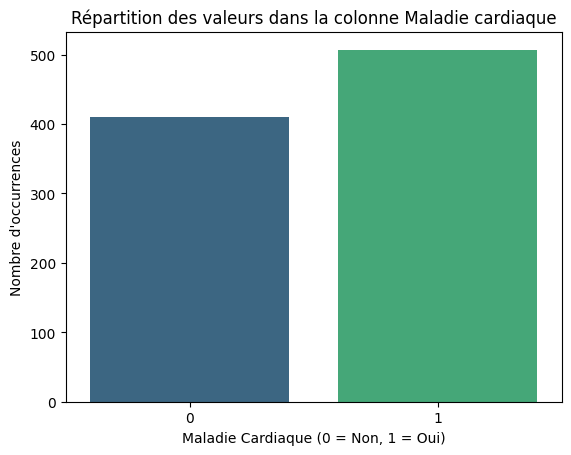

In [65]:
sns.countplot(data=df, x='Maladie_cardiaque', palette='viridis')

plt.xlabel('Maladie Cardiaque (0 = Non, 1 = Oui)')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des valeurs dans la colonne Maladie cardiaque')
plt.show()

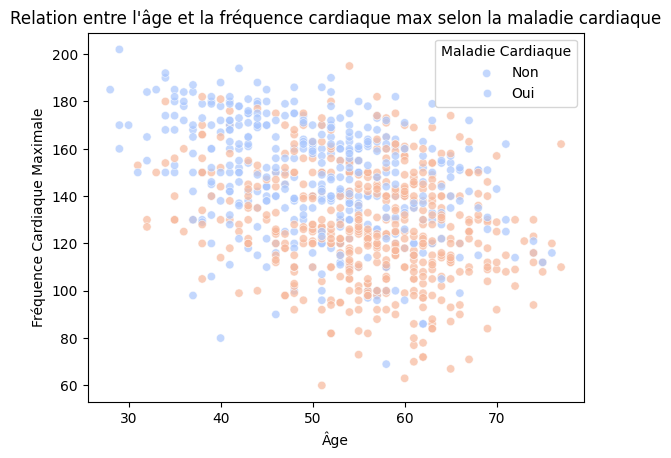

In [66]:
sns.scatterplot(
    data=df,
    x="Âge",
    y="Fréquence_cardiaque_max",
    hue="Maladie_cardiaque",  # Facteur de couleur
    palette="coolwarm",       # Palette de couleurs
    alpha=0.7                 # Transparence pour une meilleure lisibilité
)

# Personnalisation du graphique
plt.xlabel("Âge")
plt.ylabel("Fréquence Cardiaque Maximale")
plt.title("Relation entre l'âge et la fréquence cardiaque max selon la maladie cardiaque")
plt.legend(title="Maladie Cardiaque", labels=["Non", "Oui"])

# Afficher le graphique
plt.show()

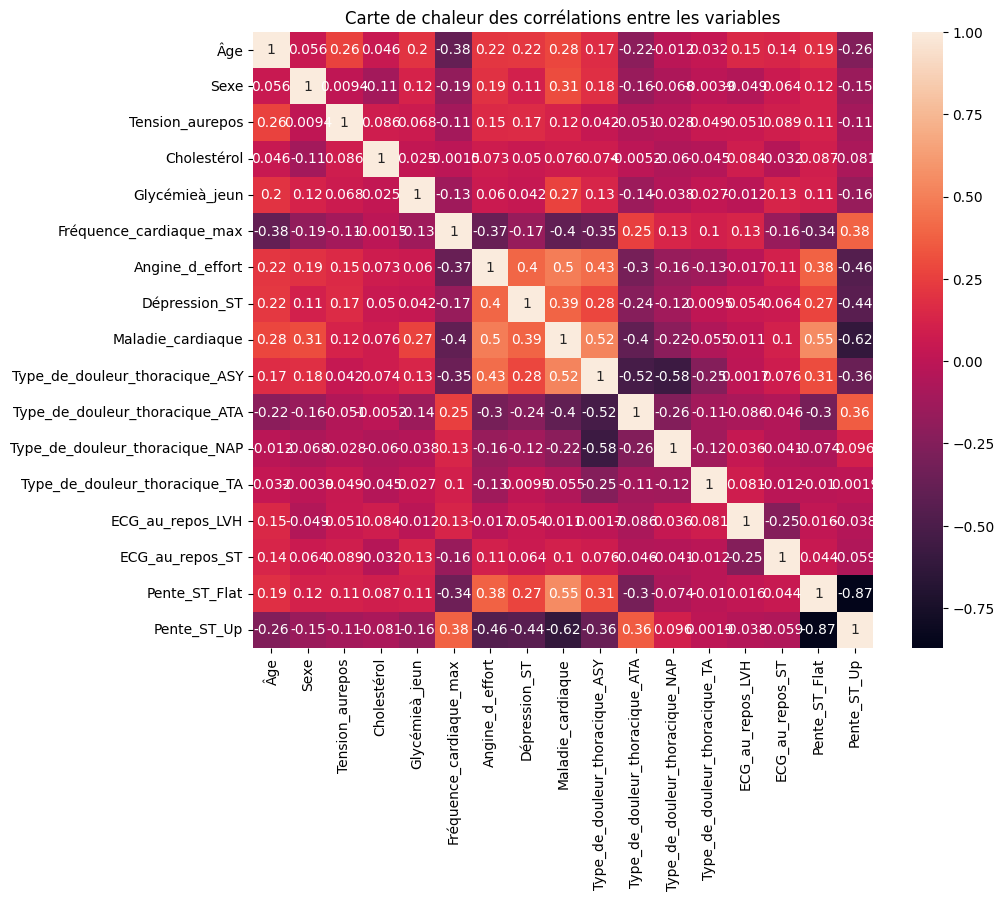

In [67]:
corr_matrix = df.corr()


plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True)

plt.title('Carte de chaleur des corrélations entre les variables')
plt.show()

### Division des données et entraînement du modèle

In [68]:

X = df.drop(columns=["Maladie_cardiaque"])  # Features
Y = df["Maladie_cardiaque"]

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [71]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Choix de la valeur de K

In [72]:

error_rate = []

max_k = 100

for i in range(1, max_k + 1):

    knn = KNeighborsClassifier(n_neighbors=i)
   
    knn.fit(X_train, Y_train)

    Y_pred_i = knn.predict(X_test)
   
    error_rate.append(1 - accuracy_score(Y_test, Y_pred_i))



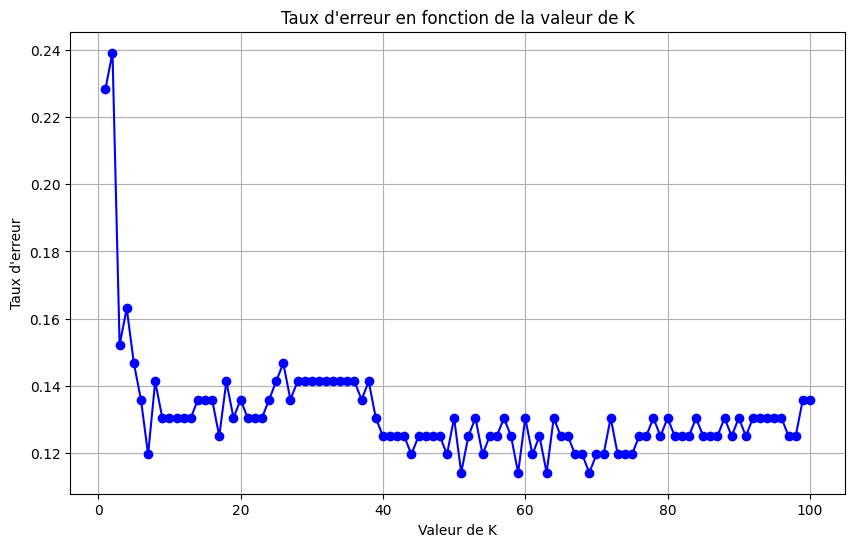

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), error_rate, color='blue', marker='o')
plt.title("Taux d'erreur en fonction de la valeur de K")
plt.xlabel("Valeur de K")
plt.ylabel("Taux d'erreur")
plt.grid()
plt.show()


In [74]:
best_k = range(1, max_k + 1)[np.argmin(error_rate)]
best_error = min(error_rate)

print(f"La meilleure valeur de K est {best_k} avec un taux d'erreur de {best_error:.4f}")

La meilleure valeur de K est 51 avec un taux d'erreur de 0.1141


## Prédictions et évaluation du modèle KNN

**Évaluez les performances de votre modèle KNN sur l'ensemble de test.**

In [78]:
knn = KNeighborsClassifier(n_neighbors=51)

knn.fit(X_train, Y_train)

pred = knn.predict(X_test)


print("WITH K=61")
print("\n")

print("Matrice de confusion :")
print(confusion_matrix(Y_test, pred))
print("\n")

print("Rapport de classification :")
print(classification_report(Y_test, pred))

WITH K=61


Matrice de confusion :
[[65  7]
 [14 98]]


Rapport de classification :
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        72
           1       0.93      0.88      0.90       112

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



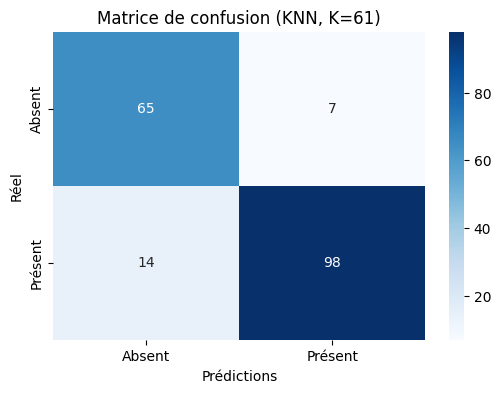

In [79]:

conf_matrix = confusion_matrix(Y_test, pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Absent", "Présent"], yticklabels=["Absent", "Présent"])
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de confusion (KNN, K=61)")
plt.show()


In [80]:

accuracy = accuracy_score(Y_test, pred)
print(f"Pourcentage de réussite : {accuracy * 100:.2f}%")

precision = precision_score(Y_test, pred)
print(f"Précision : {precision:.2f}")

Pourcentage de réussite : 88.59%
Précision : 0.93


In [97]:
nouveau_patient = np.array([    [ 31,   1, 169, 157,   0, 114,   1,   0,   1,   1,   1,   1,   1,
          1,   1,   1]]) 

print(nouveau_patient.shape)
nouveau_patient = scaler.transform(nouveau_patient)
prediction = knn.predict(nouveau_patient)

if prediction[0] == 1:
    print("Le modèle prédit que le patient est malade.")
else:
    print("Le modèle prédit que le patient est en bonne santé.")


(1, 16)
Le modèle prédit que le patient est en bonne santé.


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [98]:

probabilites = knn.predict_proba(nouveau_patient)

print(f"Probabilité d'être sain : {probabilites[0][0]*100:.2f}%")
print(f"Probabilité d'être malade : {probabilites[0][1]*100:.2f}%")

Probabilité d'être sain : 50.98%
Probabilité d'être malade : 49.02%


In [82]:
df.tail()

,Âge,Sexe,Tension_aurepos,Cholestérol,Glycémieà_jeun,Fréquence_cardiaque_max,Angine_d_effort,Dépression_ST,Maladie_cardiaque,Type_de_douleur_thoracique_ASY,Type_de_douleur_thoracique_ATA,Type_de_douleur_thoracique_NAP,Type_de_douleur_thoracique_TA,ECG_au_repos_LVH,ECG_au_repos_ST,Pente_ST_Flat,Pente_ST_Up
913,45,1,110,264,0,132,0,1,1,0,0,0,1,0,0,1,0
914,68,1,144,193,1,141,0,3,1,1,0,0,0,0,0,1,0
915,57,1,130,131,0,115,1,1,1,1,0,0,0,0,0,1,0
916,57,0,130,236,0,174,0,0,1,0,1,0,0,1,0,1,0
917,38,1,138,175,0,173,0,0,0,0,0,1,0,0,0,0,1
